In [40]:
"""

Data Science Notebook

Authors: Tolu Ibiwoye

This notebook contains all the code used to make the basketball performance script
File names used when creating the scripts are given.

"""


'\n\nData Science Notebook\n\nAuthors: Tolu Ibiwoye\n\nThis notebook contains all the code used to make the basketball performance script\nFile names used when creating the scripts are given.\n\n'

In [41]:
"""

Name: Cleaning.ipynb

Description: Cleaning script, takes unfiltered Execel file, removes empty entries, and saves the cleaned dataset to a  new CSV

Note: This script requires a Execel file to be loaded, which is not supplied due to the size of the file.
      As the csv file is already processed, this script can be skipped.

"""

'\n\nName: Cleaning.ipynb\n\nDescription: Cleaning script, takes unfiltered Execel file, removes empty entries, and saves the cleaned dataset to a  new CSV\n\nNote: This script requires a Execel file to be loaded, which is not supplied due to the size of the file.\n      As the csv file is already processed, this script can be skipped.\n\n'

In [42]:
import pandas as pd

def process_csv(filename):
    # Load the dataset
    df = pd.read_csv(filename)

    # Print the length of the DataFrame
    print("Length of the dataset:", len(df))

    # Print the first row of the DataFrame
    print("\nFirst row of the dataset:")
    print(df.iloc[0])

    return df

In [43]:
"""

Name: merging.ipynb

Description: This is intended to merge the two datasets to get a detailed single dataset with the required fields

"""

'\n\nName: merging.ipynb\n\nDescription: This is intended to merge the two datasets to get a detailed single dataset with the required fields\n\n'

In [44]:
boxscore = pd.read_csv('C:/archive/boxscore.csv')
player_info = pd.read_csv('C:/archive/player_info.csv')

merged_df = pd.merge(boxscore, player_info[['playerName', 'Pos']], on='playerName', how='left')

print(merged_df.head())

merged_df.to_csv('C:/archive/boxscore.csv', index=False)

   game_id          teamName          playerName        MP  FG  FGA  3P  3PA  \
0        1  Sacramento Kings  Corliss Williamson  37:20:00   7   11   0    0   
1        1  Sacramento Kings      Mitch Richmond  32:00:00   6   12   1    4   
2        1  Sacramento Kings      Olden Polynice  31:34:00   0    4   0    0   
3        1  Sacramento Kings  Mahmoud Abdul-Rauf  29:27:00   7   13   1    2   
4        1  Sacramento Kings         Brian Grant  25:13:00   3   11   0    0   

   FT  FTA  ...  TOV  PF  PTS   +/-  isStarter  FGM  FTM  PER  Pos_x  Pos_y  
0   0    0  ...    4   5   14  -2.0          1    4    0   16      F      F  
1   1    1  ...    3   1   14 -12.0          1    6    0    1    NaN    NaN  
2   1    4  ...    4   3    1 -12.0          1    4    3   18    C-F    C-F  
3   2    2  ...    2   2   17  -7.0          1    6    0    7      G      G  
4   2    2  ...    1   2    8  -7.0          1    8    0    6      F      F  

[5 rows x 26 columns]


In [45]:
import pandas as pd

# Specify the filename
filename = 'C:/archive/boxscore.csv'

# Call the function with the specified filename and store the returned DataFrame in 'df'
df = process_csv(filename)

# Print the first 23 rows before cleaning
print("\nBefore Cleaning:")
print(df.head(23))

# 1. Remove entries with no value in the "Per" column
df = df[pd.notna(df['PER'])]

# 2. Remove entries with "#VALUE!" in the "Per" column
df = df[df['PER'] != '#VALUE!']

# 3. Remove entries with "Player Suspended" or "Did Not Play" in the "MP" column
df = df[~df['FGA'].isin(['Player Suspended', 'Did Not Play', 'Not With Team', 'Did Not Dress'])]

# Print the first 23 rows after cleaning
print("\nAfter Cleaning:")
print(df.head(23))


Length of the dataset: 587775

First row of the dataset:
game_id                        1
teamName        Sacramento Kings
playerName    Corliss Williamson
MP                      37:20:00
FG                             7
FGA                           11
3P                             0
3PA                            0
FT                             0
FTA                            0
ORB                            1
DRB                            3
TRB                            4
AST                            4
STL                            1
BLK                            1
TOV                            4
PF                             5
PTS                           14
+/-                         -2.0
isStarter                      1
FGM                            4
FTM                            0
PER                           16
Pos_x                          F
Pos_y                          F
Name: 0, dtype: object

Before Cleaning:
    game_id              teamName          p

In [46]:
# Save the cleaned data back to boxscore.csv
df.to_csv(filename, index=False)

C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\2861234923.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_df['PER'] = pd.to_numeric(lebron_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\2861234923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_df['FG'] = pd.to_numeric(lebron_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\2861234923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

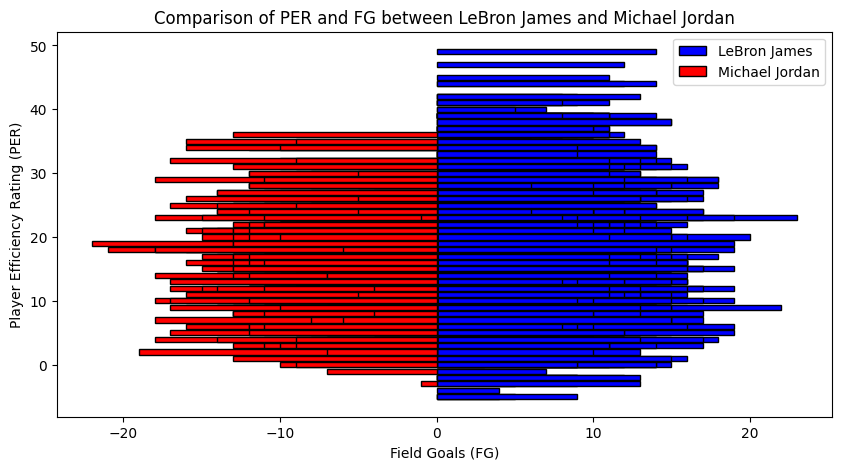

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for LeBron James and Michael Jordan
lebron_df = df[df['playerName'] == 'LeBron James']
mj_df = df[df['playerName'] == 'Michael Jordan']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
lebron_df['PER'] = pd.to_numeric(lebron_df['PER'], errors='coerce')
lebron_df['FG'] = pd.to_numeric(lebron_df['FG'], errors='coerce')
mj_df['PER'] = pd.to_numeric(mj_df['PER'], errors='coerce')
mj_df['FG'] = pd.to_numeric(mj_df['FG'], errors='coerce')

# Sort the DataFrames by 'PER' to ensure the graph is correct
lebron_df = lebron_df.sort_values(by='PER')
mj_df = mj_df.sort_values(by='PER')

# Create a population pyramid type graph
plt.figure(figsize=(10, 5))

plt.barh(lebron_df['PER'], lebron_df['FG'], color='blue', label='LeBron James', edgecolor='black')
plt.barh(mj_df['PER'], -mj_df['FG'], color='red', label='Michael Jordan', edgecolor='black')

# Adding labels and title
plt.xlabel('Field Goals (FG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Comparison of PER and FG between LeBron James and Michael Jordan')
plt.legend()

# Show the plot
plt.show()

C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\4217718123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_df['PER'] = pd.to_numeric(steph_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\4217718123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_df['FG'] = pd.to_numeric(steph_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_9080\4217718123.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

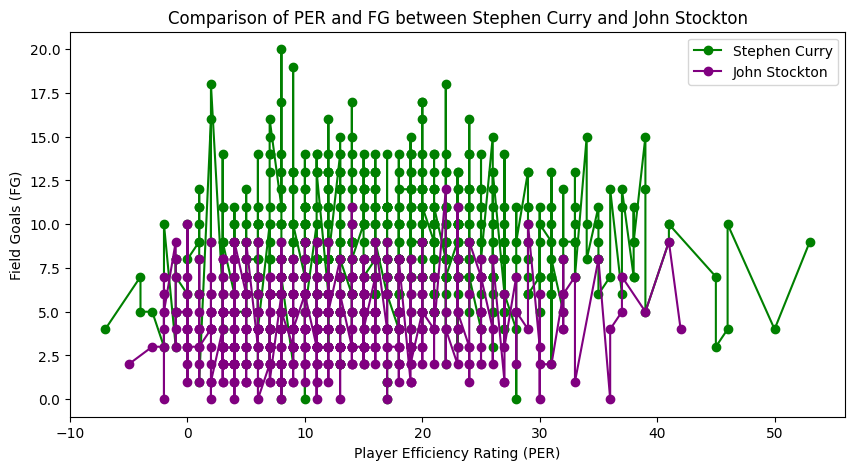

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for LeBron James and Michael Jordan
steph_df = df[df['playerName'] == 'Stephen Curry']
johnstock_df = df[df['playerName'] == 'John Stockton']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
steph_df['PER'] = pd.to_numeric(steph_df['PER'], errors='coerce')
steph_df['FG'] = pd.to_numeric(steph_df['FG'], errors='coerce')
johnstock_df['PER'] = pd.to_numeric(johnstock_df['PER'], errors='coerce')
johnstock_df['FG'] = pd.to_numeric(johnstock_df['FG'], errors='coerce')

# Sort the DataFrames by 'PER' to ensure the line graph is correct
steph_df = steph_df.sort_values(by='PER')
johnstock_df = johnstock_df.sort_values(by='PER')

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(steph_df['PER'], steph_df['FG'], color='green', label='Stephen Curry', linestyle='-', marker='o')
plt.plot(johnstock_df['PER'], johnstock_df['FG'], color='purple', label='John Stockton', linestyle='-', marker='o')

# Adding labels and title
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Field Goals (FG)')
plt.title('Comparison of PER and FG between Stephen Curry and John Stockton')
plt.legend()

# Show the plot
plt.show()